In [117]:
import numpy as np
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, confusion_matrix, auc, roc_curve
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import xgboost as xgb

/Users/keiichirosato/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/lightgbm/__init__.py:45: FutureWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS will be built by the Apple Clang compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you won't need to install the gcc compiler anymore.
Instead of that, you'll need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", FutureWarning)


In [88]:
df = pd.read_csv("モデル構築用.csv", encoding="sjis")
origin_columns = df.columns
df.columns = ["offer_date","NO","offer_time","baitai_dai","baitai_shousai","uketsuke_jikantai","uketsuke_keitai","shinki_jidokeiyaku","toriatsukai_tenban","kanri_tenban","sex","age","birth","jis","doku","sinshoku_dai","sinshoku_shousai","koyo","shugyo","kaisha_kibo","nenshu","zaisha","jukyo","kyoju","yachin","kazoku_kousei","hoken_shokushu","shunyu_shoumei","dokushin","doukyo","fuyo","fuyo_child","shotoku_shoumei","meigi","jigyo_keitai","jigyosho","month12_jiko"]
df.head()

,offer_date,NO,offer_time,baitai_dai,baitai_shousai,uketsuke_jikantai,uketsuke_keitai,shinki_jidokeiyaku,toriatsukai_tenban,kanri_tenban,...,shunyu_shoumei,dokushin,doukyo,fuyo,fuyo_child,shotoku_shoumei,meigi,jigyo_keitai,jigyosho,month12_jiko
0,2013/2/3,1.820570e+12,133504,3,2,3,502,0,182,182,...,0,1,2,0,0,0,0,6,0,0
1,2013/6/18,5.050290e+12,145329,5,99,0,1,2814,2814,505,...,0,0,1,2,1,0,0,0,0,0
2,2013/6/28,1.820590e+12,115136,5,99,0,1,2779,2779,182,...,1,0,1,1,0,8,1,0,0,0
3,2013/8/9,1.270660e+12,95034,5,99,0,1,223,223,127,...,0,1,2,0,0,0,0,0,0,0
4,2014/1/27,2.090350e+12,165240,5,99,0,1,1836,1836,209,...,0,0,2,0,0,0,0,0,0,0


In [89]:
df = df.drop(['offer_date', 'birth'], axis=1)
df.head()

,NO,offer_time,baitai_dai,baitai_shousai,uketsuke_jikantai,uketsuke_keitai,shinki_jidokeiyaku,toriatsukai_tenban,kanri_tenban,sex,...,shunyu_shoumei,dokushin,doukyo,fuyo,fuyo_child,shotoku_shoumei,meigi,jigyo_keitai,jigyosho,month12_jiko
0,1.820570e+12,133504,3,2,3,502,0,182,182,1,...,0,1,2,0,0,0,0,6,0,0
1,5.050290e+12,145329,5,99,0,1,2814,2814,505,1,...,0,0,1,2,1,0,0,0,0,0
2,1.820590e+12,115136,5,99,0,1,2779,2779,182,1,...,1,0,1,1,0,8,1,0,0,0
3,1.270660e+12,95034,5,99,0,1,223,223,127,1,...,0,1,2,0,0,0,0,0,0,0
4,2.090350e+12,165240,5,99,0,1,1836,1836,209,1,...,0,0,2,0,0,0,0,0,0,0


In [4]:
#trainとtestに分割
train_df, test_df = train_test_split(df, test_size = 0.1, random_state=0)

In [61]:
np.sum(train_df['month12_jiko']==1)

2908

In [26]:
np.array(train_df)

array([[5.72064e+12, 1.20956e+05, 4.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [3.20073e+12, 2.03034e+05, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [3.17070e+12, 1.63012e+05, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [3.20074e+12, 1.91818e+05, 5.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.63113e+12, 1.93449e+05, 5.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [1.30632e+11, 1.01822e+05, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00]])

In [47]:
hoge_list = random.sample(list(np.array(train_df)), np.array(train_df).shape[0])

In [48]:
len(hoge_list)

9565

In [49]:
np.sum(test_df['month12_jiko']==1)

150

In [64]:
count = 0
hoge_list = random.sample(list(np.array(train_df)), np.array(train_df).shape[0])
equal_train_list = []
for i in range(np.array(train_df).shape[0]):
    if hoge_list[i][34] == 1:
        equal_train_list.append(hoge_list[i])
        count += 1
    if count == np.sum(train_df['month12_jiko']==1):
        break
count = 0
for i in range(np.array(train_df).shape[0]):
    if hoge_list[i][34] == 0:
        equal_train_list.append(hoge_list[i])
        count += 1
    if count == np.sum(train_df['month12_jiko']==1):
        break
equal_train_list = random.sample(equal_train_list, len(equal_train_list))

In [65]:
count = 0
hoge_list = random.sample(list(np.array(test_df)), np.array(test_df).shape[0])
equal_test_list = []
for i in range(np.array(test_df).shape[0]):
    if hoge_list[i][34] == 1:
        equal_test_list.append(hoge_list[i])
        count += 1
    if count == np.sum(test_df['month12_jiko']==1):
        break
count = 0
for i in range(np.array(train_df).shape[0]):
    if hoge_list[i][34] == 0:
        equal_test_list.append(hoge_list[i])
        count += 1
    if count == np.sum(test_df['month12_jiko']==1):
        break
equal_test_list = random.sample(equal_test_list, len(equal_test_list))

In [76]:
train_X = pd.DataFrame(equal_train_list).drop(34,axis=1)
test_X = pd.DataFrame(equal_test_list).drop(34,axis=1)
train_y = pd.DataFrame(equal_train_list).iloc[:,34]
test_y = pd.DataFrame(equal_test_list).iloc[:,34]

In [78]:
#RF回帰モデル作成
rf_reg = RandomForestRegressor(verbose = 1, n_estimators=100, max_depth=20)
rf_reg.fit(train_X,train_y)
pred_y_reg = rf_reg.predict(test_X)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [79]:
#RF分類モデル作成
rf_cla = RandomForestClassifier(verbose = 1, n_estimators=100, max_depth=20)
rf_cla.fit(train_X,train_y)
pred_y_cla = rf_cla.predict(test_X)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [80]:
#分類正解率
accuracy_score(test_y, pred_y_cla)

0.66

In [82]:
precision, recall, thresholds = roc_curve(test_y, pred_y_cla)
auc(precision, recall)

0.6599999999999999

In [83]:
#RF分類の結果
confusion_matrix(test_y, pred_y_cla, labels=[0,1])

array([[ 98,  52],
       [ 50, 100]])

In [84]:
#営業利益の算出(一次関数)
def operating_profit_linear(y_pred_reg, y_pred_cla, y_test, offset):
    gain_list = []
    loss_list = []
    for i in y_pred_reg:
        if i > offset:
            gain_list.append(0)
        elif i <= offset:
            gain_list.append(int(-(45*i)/offset+50))
    gain = np.sum(gain_list)
    for i in range(len(y_pred_cla)):
        if (y_pred_cla[i] == 0 and y_test[i] == 1):
            loss_list.append(gain_list[i])
        else:
            loss_list.append(0)
    loss = np.sum(loss_list)
    return gain, loss, int(gain*0.18-loss)

In [85]:
para_list = [i*0.01 for i in range(1,101)]
profit_list = []
for para in para_list:
    binary_pred_y_reg = []
    for j in pred_y_reg:
        if j > para:
            binary_pred_y_reg.append(1)
        elif j <= para:
            binary_pred_y_reg.append(0)
    profit_list.append(operating_profit_linear(pred_y_reg, binary_pred_y_reg, list(test_y), para)[2])
para_list.insert(0, 0)
profit_list.insert(0, 0)

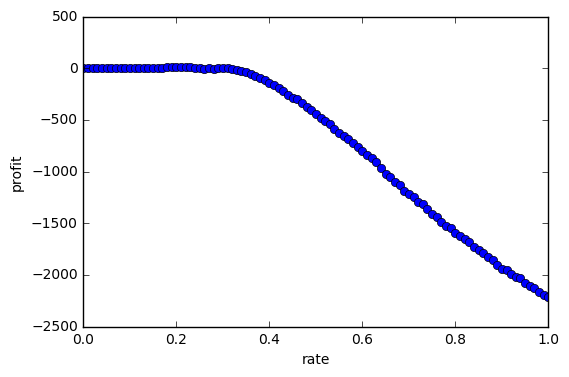

In [86]:
plt.figure()
plt.plot(para_list, profit_list, 'o')
plt.xlabel('rate')
plt.ylabel("profit")
plt.show()

In [87]:
from imblearn.over_sampling import SMOTE

In [99]:
#trainとtestに分割
train_df, test_df = train_test_split(df, test_size = 0.1, random_state=0)
train_X_df = train_df.drop('month12_jiko',axis=1)
test_X = test_df.drop('month12_jiko',axis=1)
train_y_df = train_df['month12_jiko']
test_y = test_df['month12_jiko']

In [100]:
sm = SMOTE(random_state=42)
train_X, train_y = sm.fit_sample(train_X_df, train_y_df)

In [101]:
#RF回帰モデル作成
rf_reg = RandomForestRegressor(verbose = 1, n_estimators=100, max_depth=20)
rf_reg.fit(train_X,train_y)
pred_y_reg = rf_reg.predict(test_X)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   16.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [102]:
#RF分類モデル作成
rf_cla = RandomForestClassifier(verbose = 1, n_estimators=100, max_depth=20)
rf_cla.fit(train_X,train_y)
pred_y_cla = rf_cla.predict(test_X)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [103]:
#分類正解率
accuracy_score(test_y, pred_y_cla)

0.8617121354656632

In [104]:
precision, recall, thresholds = roc_curve(test_y, pred_y_cla)
auc(precision, recall)

0.5406425702811244

In [118]:
precision, recall, thresholds = roc_curve(test_y, pred_y_reg)
auc(precision, recall)

0.6829426798101497

In [105]:
#RF分類の結果
confusion_matrix(test_y, pred_y_cla, labels=[0,1])

array([[902,  11],
       [136,  14]])

In [106]:
#営業利益の算出(一次関数)
def operating_profit_linear(y_pred_reg, y_pred_cla, y_test, offset):
    gain_list = []
    loss_list = []
    for i in y_pred_reg:
        if i > offset:
            gain_list.append(0)
        elif i <= offset:
            gain_list.append(int(-(45*i)/offset+50))
    gain = np.sum(gain_list)
    for i in range(len(y_pred_cla)):
        if (y_pred_cla[i] == 0 and y_test[i] == 1):
            loss_list.append(gain_list[i])
        else:
            loss_list.append(0)
    loss = np.sum(loss_list)
    return gain, loss, int(gain*0.18-loss)

In [107]:
para_list = [i*0.01 for i in range(1,101)]
profit_list = []
for para in para_list:
    binary_pred_y_reg = []
    for j in pred_y_reg:
        if j > para:
            binary_pred_y_reg.append(1)
        elif j <= para:
            binary_pred_y_reg.append(0)
    profit_list.append(operating_profit_linear(pred_y_reg, binary_pred_y_reg, list(test_y), para)[2])
para_list.insert(0, 0)
profit_list.insert(0, 0)

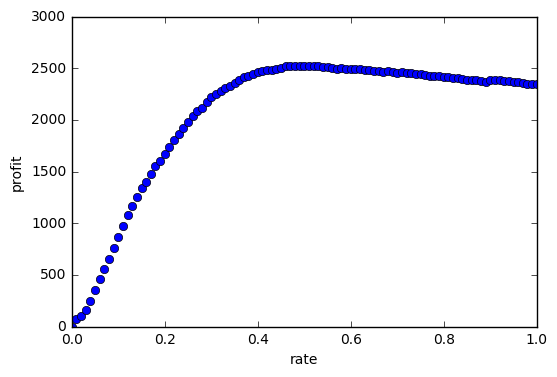

In [108]:
plt.figure()
plt.plot(para_list, profit_list, 'o')
plt.xlabel('rate')
plt.ylabel("profit")
plt.show()

In [109]:
print(np.max(profit_list))
print(np.argmax(profit_list))

2525
47


In [110]:
#最大利益の場合をバイナリ化
threshold = np.argmax(profit_list)/100
binary_pred_y_reg = []
for i in pred_y_reg:
    if i > threshold:
        binary_pred_y_reg.append(1)
    elif i <= threshold:
        binary_pred_y_reg.append(0)

In [111]:
#最大利益の場合でRF回帰の結果を0,1に変換した結果
confusion_matrix(test_y, binary_pred_y_reg, labels=[0,1])

array([[889,  24],
       [124,  26]])

In [112]:
#営業利益の算出(一次関数_ver2)
def operating_profit_linear_ver2(y_pred_reg, y_pred_cla, y_test, offset_n, offset_m):
    gain_list = []
    loss_list = []
    for i in y_pred_reg:
        if i > offset_n:
            gain_list.append(0)
        elif i <= offset_n and i >= offset_m:
            gain_list.append(int((-45/(offset_n-offset_m))*i+(45*offset_n/(offset_n-offset_m))+5))
        elif i < offset_m:
            gain_list.append(50)
    gain = np.sum(gain_list)
    for i in range(len(y_pred_cla)):
        if (y_pred_cla[i] == 0 and y_test[i] == 1):
            loss_list.append(gain_list[i])
        else:
            loss_list.append(0)
    loss = np.sum(loss_list)
    return gain, loss, int(gain*0.18-loss)

In [113]:
para_list = [i*0.01 for i in range(1,101)]
profit_list = []
for para_n in para_list:
    profit_list_m = []
    binary_pred_y_reg = []
    for j in pred_y_reg:
        if j > para_n:
            binary_pred_y_reg.append(1)
        elif j <= para_n:
            binary_pred_y_reg.append(0)
    for para_m in para_list:
        if para_m < para_n:
            profit_list_m.append(operating_profit_linear_ver2(pred_y_reg, binary_pred_y_reg, list(test_y), para_n, para_m)[2])
        else:
            profit_list_m.append(0)
            #profit_list_m.insert(0, 0)
    profit_list.append(profit_list_m)
#para_list.insert(0, 0)

In [114]:
np.max(profit_list)

3477

# アンサンブル

In [115]:
#RF回帰モデル作成
rf_reg = RandomForestRegressor(verbose = 1, n_estimators=100, max_depth=20)
rf_reg.fit(train_X,train_y)
rf_pred_y_reg = rf_reg.predict(test_X)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   15.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [119]:
#lightBGM回帰モデル作成
model_reg = lgb.LGBMRegressor()
model_reg.fit(train_X, train_y)
bgm_pred_y_reg_array = model_reg.predict(test_X)
bgm_pred_y_reg = []
for i in bgm_pred_y_reg_array:
    if i >= 0:
        bgm_pred_y_reg.append(i)
    elif i < 0:
        bgm_pred_y_reg.append(0)
bgm_pred_y_reg = np.array(bgm_pred_y_reg)

In [121]:
#XGboost回帰モデル作成
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(train_X, train_y)
xgb_pred_y_reg_array = xgb_reg.predict(np.array(test_X))
xgb_pred_y_reg = []
for i in xgb_pred_y_reg_array:
    if i >= 0:
        xgb_pred_y_reg.append(i)
    elif i < 0:
        xgb_pred_y_reg.append(0)
xgb_pred_y_reg = np.array(xgb_pred_y_reg)

In [122]:
pred_y_reg=(rf_pred_y_reg+bgm_pred_y_reg+xgb_pred_y_reg)/3

In [123]:
para_list = [i*0.01 for i in range(1,101)]
profit_list = []
for para in para_list:
    binary_pred_y_reg = []
    for j in pred_y_reg:
        if j > para:
            binary_pred_y_reg.append(1)
        elif j <= para:
            binary_pred_y_reg.append(0)
    profit_list.append(operating_profit_linear(pred_y_reg, binary_pred_y_reg, list(test_y), para)[2])
para_list.insert(0, 0)
profit_list.insert(0, 0)

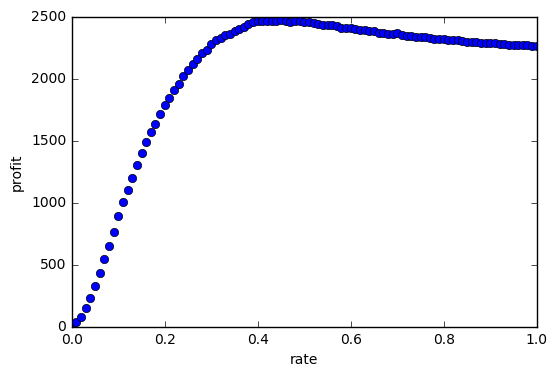

In [124]:
plt.figure()
plt.plot(para_list, profit_list, 'o')
plt.xlabel('rate')
plt.ylabel("profit")
plt.show()

In [125]:
print(np.max(profit_list))
print(np.argmax(profit_list))

2474
45


In [126]:
#最大利益の場合をバイナリ化
threshold = np.argmax(profit_list)/100
binary_pred_y_reg = []
for i in pred_y_reg:
    if i > threshold:
        binary_pred_y_reg.append(1)
    elif i <= threshold:
        binary_pred_y_reg.append(0)

In [127]:
#最大利益の場合でRF回帰の結果を0,1に変換した結果
confusion_matrix(test_y, binary_pred_y_reg, labels=[0,1])

array([[894,  19],
       [129,  21]])

In [128]:
para_list = [i*0.01 for i in range(1,101)]
profit_list = []
for para_n in para_list:
    profit_list_m = []
    binary_pred_y_reg = []
    for j in pred_y_reg:
        if j > para_n:
            binary_pred_y_reg.append(1)
        elif j <= para_n:
            binary_pred_y_reg.append(0)
    for para_m in para_list:
        if para_m < para_n:
            profit_list_m.append(operating_profit_linear_ver2(pred_y_reg, binary_pred_y_reg, list(test_y), para_n, para_m)[2])
        else:
            profit_list_m.append(0)
            #profit_list_m.insert(0, 0)
    profit_list.append(profit_list_m)
#para_list.insert(0, 0)

In [129]:
np.max(profit_list)

3379

In [130]:
precision, recall, thresholds = roc_curve(test_y, pred_y_reg)
auc(precision, recall)

0.7030887185104053

# アンサンブル(重みを考慮)

In [131]:
acu_rf = mean_squared_error(test_y, rf_pred_y_reg)
acu_bgm = mean_squared_error(test_y, bgm_pred_y_reg)
acu_xgb = mean_squared_error(test_y, xgb_pred_y_reg)

In [132]:
sum_acu = acu_rf + acu_bgm + acu_xgb
pred_y_reg = (acu_rf*rf_pred_y_reg + acu_bgm*bgm_pred_y_reg + acu_xgb*xgb_pred_y_reg) / sum_acu

In [133]:
para_list = [i*0.01 for i in range(1,101)]
profit_list = []
for para in para_list:
    binary_pred_y_reg = []
    for j in pred_y_reg:
        if j > para:
            binary_pred_y_reg.append(1)
        elif j <= para:
            binary_pred_y_reg.append(0)
    profit_list.append(operating_profit_linear(pred_y_reg, binary_pred_y_reg, list(test_y), para)[2])
para_list.insert(0, 0)
profit_list.insert(0, 0)

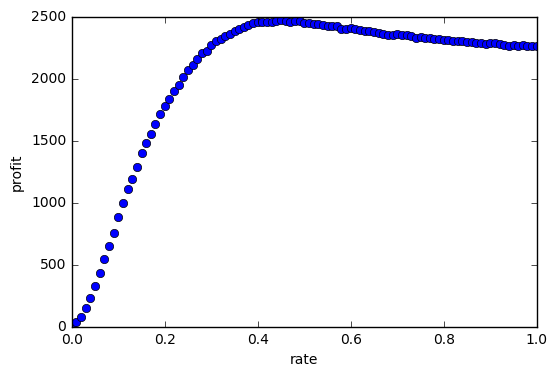

In [134]:
plt.figure()
plt.plot(para_list, profit_list, 'o')
plt.xlabel('rate')
plt.ylabel("profit")
plt.show()

In [135]:
print(np.max(profit_list))
print(np.argmax(profit_list))

2473
45


In [136]:
#最大利益の場合をバイナリ化
threshold = np.argmax(profit_list)/100
binary_pred_y_reg = []
for i in pred_y_reg:
    if i > threshold:
        binary_pred_y_reg.append(1)
    elif i <= threshold:
        binary_pred_y_reg.append(0)

In [137]:
#最大利益の場合でRF回帰の結果を0,1に変換した結果
confusion_matrix(test_y, binary_pred_y_reg, labels=[0,1])

array([[895,  18],
       [129,  21]])

In [138]:
para_list = [i*0.01 for i in range(1,101)]
profit_list = []
for para_n in para_list:
    profit_list_m = []
    binary_pred_y_reg = []
    for j in pred_y_reg:
        if j > para_n:
            binary_pred_y_reg.append(1)
        elif j <= para_n:
            binary_pred_y_reg.append(0)
    for para_m in para_list:
        if para_m < para_n:
            profit_list_m.append(operating_profit_linear_ver2(pred_y_reg, binary_pred_y_reg, list(test_y), para_n, para_m)[2])
        else:
            profit_list_m.append(0)
            #profit_list_m.insert(0, 0)
    profit_list.append(profit_list_m)
#para_list.insert(0, 0)

In [139]:
np.max(profit_list)

3366

In [140]:
precision, recall, thresholds = roc_curve(test_y, pred_y_reg)
auc(precision, recall)

0.7027090178897407